<a href="https://colab.research.google.com/github/Parabucolica/ProgramacaoEstatistica/blob/main/labs/Prog_Estat_Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Exercício 1: Exponencial

1. Implemente um gerador de variáveis aleatórias com distribuição Exponencial($\lambda$) utilizando o **método da inversão**, como visto em sala.

2. Para um valor fixo de $\lambda$, gere uma amostra de tamanho $10^5$ utilizando o método implementado.

3. Plote o **histograma** da amostra gerada e compare visualmente com a densidade teórica da distribuição Exponencial($\lambda$).

4. Compare também a amostra obtida com aquela gerada pela função `numpy.random.exponential`.

5. Repita a comparação para valores pequenos e grandes de $\lambda$ (por exemplo, $\lambda = 0.5$ e $\lambda = 5$) e discuta como isso afeta a forma da distribuição.



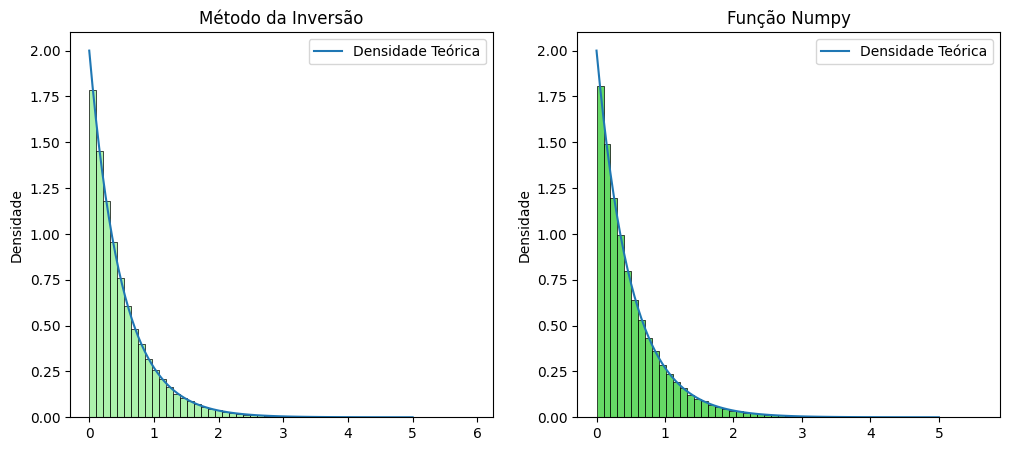

In [6]:
def densidade_exp(t,lmda):
  return lmda*np.exp(-lmda*t)


def exponencial(lmda):
  u = np.random.uniform()
  return float(-np.log(u)/lmda)



x=np.linspace(0,5,100)

fig, axs = plt.subplots(ncols=2, figsize=(12,5))
sns.histplot(data=[exponencial(2) for _ in range(100000)],stat='density', color="lightgreen", bins=55,ax=axs[0]).set(title= "Método da Inversão", ylabel='Densidade')
sns.lineplot(x=x, y=densidade_exp(x,2), ax=axs[0], label='Densidade Teórica')

sns.histplot(data=np.random.exponential(1/2,size=100000),stat='density', color="limegreen", bins=55, ax=axs[1]).set(title="Função Numpy", ylabel='Densidade')
sns.lineplot(x=x, y=densidade_exp(x,2), ax=axs[1], label='Densidade Teórica')
axs[0].legend()
axs[1].legend()

## Exercício 2: Aproximação da Exponencial pela Geométrica

Lembre-se de que, se $T \sim \text{Geom}(p)$ representa o número de ensaios até o primeiro sucesso em uma sequência de Bernoulli($p$), então para $n$ grande e $p = \lambda/n$, a variável $T/n$ converge em distribuição para uma Exponencial($\lambda$).

1. Implemente um gerador de variáveis aleatórias que utiliza essa aproximação:  
   - Gere $T \sim \text{Geom}(p)$ com $p = \lambda/n$;  
   - Retorne $X = T/n$ como aproximação de $X \sim \text{Exp}(\lambda)$.

2. Para um valor fixo de $\lambda$, gere uma amostra de tamanho $10^5$ usando esse método para diferentes valores de $n$ (por exemplo, $n = 50, 500, 5000$).

3. Plote os histogramas obtidos e compare com a densidade teórica da Exponencial($\lambda$).  


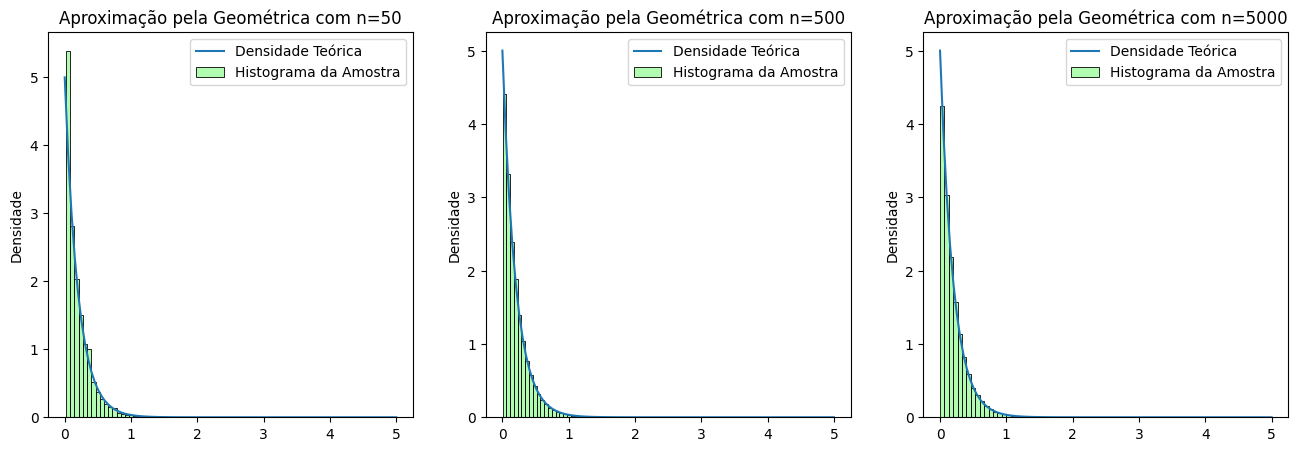

In [14]:
def geometrica_inversao(p):
  u = np.random.uniform()
  return int(np.log(u)/np.log(1-p)) + 1

def exponencial_por_geometrica(lmda, n):
  return geometrica_inversao(lmda/n)/n


fig, axs = plt.subplots(ncols=3, figsize=(16,5))
for m,i in [(50,0),(500,1),(5000,2)]:
  sns.histplot([exponencial_por_geometrica(5,m) for _ in range(100000)],bins=40, color="palegreen",stat='density',ax=axs[i], label='Histograma da Amostra').set(title=f"Aproximação pela Geométrica com n={m}", ylabel='Densidade')
  sns.lineplot(x=x, y=densidade_exp(x,5), ax=axs[i], label="Densidade Teórica")
  axs[i].legend()




## Exercício 3: Simulação da Poisson a partir de Exponenciais

Considere a distribuição $\text{Poisson}(\mu)$, que conta o número de ocorrências em um intervalo de comprimento $1$.  
Uma forma alternativa de simular essa variável é utilizar variáveis Exponenciais($\mu$), que representam os tempos entre ocorrências.

### Tarefas

1. Implemente a função `poisson_via_exp(mu)` que gera uma realização de $\text{Poisson}(\mu)$ da seguinte forma:  
   - Some variáveis Exponenciais($\mu$) sucessivas até ultrapassar o valor $1$;  
   - Retorne o número de somas realizadas **antes** de ultrapassar $1$.

2. Use essa função para gerar uma amostra de tamanho $10^4$ de $\text{Poisson}(4)$ (isto é, $\mu = 4$ e $t = 1$ fixo).  

3. Plote o histograma da amostra obtida e compare com uma amostra gerada pela função `numpy.random.poisson(lam=mu)`.  

4. Calcule e compare as médias e variâncias empíricas com os valores teóricos:  
   - $\mathbb{E}[X] = \mu$  
   - $\mathrm{Var}(X) = \mu$


Média Teórica: 4 
 Média Amostral: 3.9899 
 Variância Teórica: 4 
 Variância Amostral:3.8875979900000015


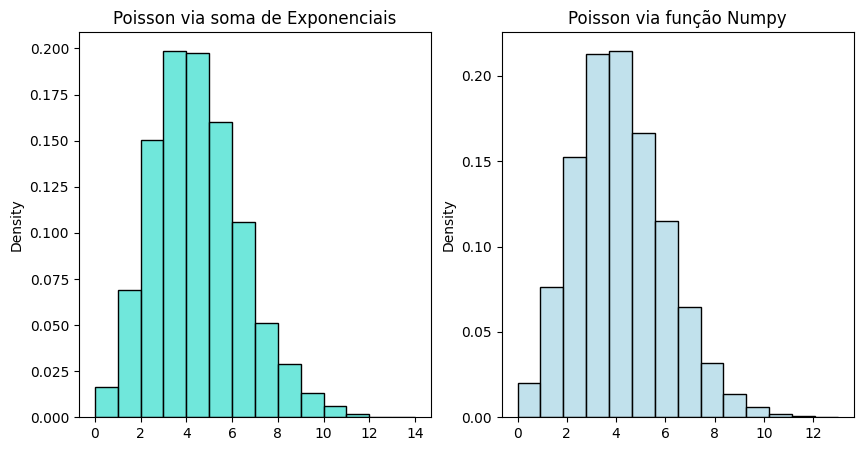

In [8]:
def poisson_via_exp(mu):
  i = 0
  soma = exponencial(mu)
  while soma < 1:
    soma += exponencial(mu)
    i += 1
  return i
  # uma "soma" ocorre fora do loop e portanto não é contabilizada, equivale
  # a subtrair 1 no fim
amostra = [poisson_via_exp(4) for _ in range(10000)]
fig, axs = plt.subplots(ncols=2, figsize=(10,5))


sns.histplot(amostra, color='turquoise', ax=axs[0], bins=14, stat='density').set(title='Poisson via soma de Exponenciais')
sns.histplot(np.random.poisson(4, size=10000), color='lightblue',ax=axs[1],bins=14, stat='density').set(title='Poisson via função Numpy')

a = sum(amostra) / len(amostra)
print(f'Média Teórica: 4 \n',
      f'Média Amostral: {a} \n',
      f'Variância Teórica: 4 \n',
      f'Variância Amostral:{1/len(amostra)*sum([i**2 for i in amostra]) - a**2}'
      )

